<a href="https://colab.research.google.com/github/Mhervin47/-Tomato-Leaf-Disease-Classification-Using-VGG19/blob/main/Tomato_leaves_disease_detection_using_VGG19_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub==0.3.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 1.5 MB/s eta 0:00:00
  Attempting uninstall: kagglehub
    Found existing installation: kagglehub 0.3.7
    Uninstalling kagglehub-0.3.7:
      Successfully uninstalled kagglehub-0.3.7


In [ ]:
import os
os.environ["KAGGLE_CONFIG_DIR"]= "/content"

In [ ]:
! kaggle datasets download -d cookiefinder/tomato-disease-multiple-sources

Dataset URL: https://www.kaggle.com/datasets/cookiefinder/tomato-disease-multiple-sources
License(s): CC0-1.0
100% 1.37G/1.37G [00:16<00:00, 80.6MB/s]
100% 1.37G/1.37G [00:16<00:00, 89.5MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: valid/Late_blight/9afc2537-1b13-4c25-b5ed-5b8de511b0ab___GHLB2 Leaf 9033.JPG  
  inflating: valid/Late_blight/9bb49d22-976d-40c3-bc9a-bff5cbbd8e28___RS_Late.B 5057.JPG  
  inflating: valid/Late_blight/9c274db5-2f89-4f3c-b9e2-4d5ebc54ddad___GHLB2 Leaf 9096.JPG  
  inflating: valid/Late_blight/9c726f4e-045b-4080-b53d-d7e66d45bcb1___RS_Late.B 4876.JPG  
  inflating: valid/Late_blight/9e5dd34f-124c-4a64-ba9f-77c8d05faa9c___GHLB2 Leaf 8749.JPG  
  inflating: valid/Late_blight/9e633823-3dde-450c-8172-733021e4dff0___RS_Late.B 6414.JPG  
  inflating: valid/Late_blight/9ecb8001-2f48-4487-b287-535dbcfb5c2f___RS_Late.B 6206.JPG  
  inflating: valid/Late_blight/9f7dcd60-e691-4c1e-830e-7495f7cc123d___RS_Late.B 6166.JPG  
  inflating: valid/Late_blight/Bacterial_spots2276_jpg.rf.5becd3793ec2a532bf8f111d60911c63.jpg  
  inflating: valid/Late_blight/IMG_1526_jpg.rf.5e25005985e2b12a6f52bfa7120f3eee.jpg  
  inflating: valid/Late_blight/IMG_

In [ ]:
!ls

sample_data  train  valid


In [ ]:
import os
import shutil
import random


train_dir = "/content/train"
valid_dir = "/content/valid"


output_dir = "/content/split_dataset"
train_out = os.path.join(output_dir, "train")
valid_out = os.path.join(output_dir, "valid")
test_out = os.path.join(output_dir, "test")


for d in [train_out, valid_out, test_out]:
    os.makedirs(d, exist_ok=True)


def split_and_copy(input_dirs, train_out, valid_out, test_out, train_ratio=0.8, valid_ratio=0.1, test_ratio=0.1):
    for input_dir in input_dirs:
        for class_name in os.listdir(input_dir):
            class_path = os.path.join(input_dir, class_name)
            if not os.path.isdir(class_path):
                continue

            images = os.listdir(class_path)
            random.shuffle(images)


            train_split = int(len(images) * train_ratio)
            valid_split = train_split + int(len(images) * valid_ratio)


            os.makedirs(os.path.join(train_out, class_name), exist_ok=True)
            os.makedirs(os.path.join(valid_out, class_name), exist_ok=True)
            os.makedirs(os.path.join(test_out, class_name), exist_ok=True)


            for i, img in enumerate(images):
                src_path = os.path.join(class_path, img)

                if i < train_split:
                    dst_path = os.path.join(train_out, class_name, img)
                elif i < valid_split:
                    dst_path = os.path.join(valid_out, class_name, img)
                else:
                    dst_path = os.path.join(test_out, class_name, img)

                shutil.copy(src_path, dst_path)


split_and_copy([train_dir, valid_dir], train_out, valid_out, test_out)

print("Dataset split completed successfully!")


Dataset split completed successfully!


In [ ]:
def count_images(directory):
    count = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            count[class_name] = len(os.listdir(class_path))
    return count

print("Training set distribution:", count_images(train_out))
print("Validation set distribution:", count_images(valid_out))
print("Test set distribution:", count_images(test_out))

Training set distribution: {'healthy': 3084, 'Target_Spot': 1826, 'Spider_mites Two-spotted_spider_mite': 1745, 'Tomato_Yellow_Leaf_Curl_Virus': 2029, 'powdery_mildew': 1004, 'Bacterial_spot': 2845, 'Leaf_Mold': 2794, 'Septoria_leaf_spot': 2901, 'Late_blight': 3123, 'Tomato_mosaic_virus': 2189, 'Early_blight': 2478}
Validation set distribution: {'healthy': 385, 'Target_Spot': 227, 'Spider_mites Two-spotted_spider_mite': 217, 'Tomato_Yellow_Leaf_Curl_Virus': 252, 'powdery_mildew': 125, 'Bacterial_spot': 355, 'Leaf_Mold': 348, 'Septoria_leaf_spot': 362, 'Late_blight': 390, 'Tomato_mosaic_virus': 273, 'Early_blight': 309}
Test set distribution: {'healthy': 388, 'Target_Spot': 231, 'Spider_mites Two-spotted_spider_mite': 220, 'Tomato_Yellow_Leaf_Curl_Virus': 256, 'powdery_mildew': 127, 'Bacterial_spot': 358, 'Leaf_Mold': 351, 'Septoria_leaf_spot': 365, 'Late_blight': 392, 'Tomato_mosaic_virus': 275, 'Early_blight': 311}


In [ ]:
import cv2
val_dir = "/content/split_dataset/valid"
for class_name in os.listdir(val_dir):
    class_path = os.path.join(val_dir, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                img = cv2.imread(img_path)
                if img is None or img.shape[0] == 0 or img.shape[1] == 0:
                    print(f"Removing truncated image: {img_path}")
                    os.remove(img_path)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

In [ ]:
import cv2
train_dir = "/content/split_dataset/train"
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                img = cv2.imread(img_path)
                if img is None or img.shape[0] == 0 or img.shape[1] == 0:
                    print(f"Removing truncated image: {img_path}")
                    os.remove(img_path)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

Removing truncated image: /content/split_dataset/train/healthy/HL_(336).png


In [ ]:
import cv2
test_dir = "/content/split_dataset/test"
for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                img = cv2.imread(img_path)
                if img is None or img.shape[0] == 0 or img.shape[1] == 0:
                    print(f"Removing truncated image: {img_path}")
                    os.remove(img_path)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = "/content/split_dataset/train"
test_dir = "/content/split_dataset/test"
valid_dir = "/content/split_dataset/valid"

# Load datasets
IMG_SIZE = 224
BATCH_SIZE = 32

# Load train dataset with augmentation
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True
)

# Load test dataset
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Load validation dataset
valid_dataset = image_dataset_from_directory(
    valid_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 26017 files belonging to 11 classes.
Found 3274 files belonging to 11 classes.
Found 3243 files belonging to 11 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2],
    zoom_range=[0.8, 1.0],
    horizontal_flip=True,
    validation_split=0.2
)
train_generator = train_datagen.flow_from_directory(
        "/content/split_dataset/train",
        target_size=(IMG_SIZE,IMG_SIZE),
        batch_size=32,
        class_mode='categorical'
)

Found 26017 images belonging to 11 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
        "/content/split_dataset/valid",
        target_size=(IMG_SIZE,IMG_SIZE),
        batch_size=32,
        class_mode='categorical'
)

Found 3243 images belonging to 11 classes.


In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255,)
test_generator = test_datagen.flow_from_directory(
        "/content/split_dataset/test",
        target_size=(IMG_SIZE,IMG_SIZE),
        batch_size=32,
        class_mode='categorical'
)

Found 3274 images belonging to 11 classes.


In [ ]:
print(f"Training data: {len(train_generator.filenames)} images")
print(f"Validation data: {len(validation_generator.filenames)} images")
print(f"Test data: {len(test_generator.filenames)} images")

Training data: 26017 images
Validation data: 3243 images
Test data: 3274 images


In [ ]:
x_batch, y_batch = next(train_generator)
print(f"Image batch shape: {x_batch.shape}")
print(f"Label batch shape: {y_batch.shape}")

Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 11)


In [ ]:
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
# Load VGG19 with pre-trained weights, exclude top layer
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = True

from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

x = Flatten()(base_model.output)  # Flatten the extracted features
x = BatchNormalization()(x)  # Normalize activations
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Increased dropout for regularization
output_layer = Dense(11, activation='softmax')(x)  # 11-class classification

# Define model
model = Model(inputs=base_model.input, outputs=output_layer)


# Compile with Lower Learning Rate
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Model summary
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 32,975,947 (125.79 MB)

 Trainable params: 32,925,771 (125.60 MB)

 Non-trainable params: 50,176 (196.00 KB)

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
def lr_scheduler(epoch, lr):
    if epoch > 8:  # Reduce LR after 10 epochs
        return lr * 0.1  # Reduce LR by 10x
    return lr
# Define Callbacks (Learning Rate Scheduler + Early Stopping)
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
lr_callback = keras.callbacks.LearningRateScheduler(lr_scheduler)

# Train the model
history = model.fit(train_generator,validation_data=validation_generator,epochs=20,callbacks=[early_stopping, lr_callback],verbose=1)

Epoch 1/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 599s 679ms/step - accuracy: 0.2977 - loss: 2.0836 - val_accuracy: 0.6886 - val_loss: 0.9189 - learning_rate: 1.0000e-05
Epoch 2/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 551s 676ms/step - accuracy: 0.7323 - loss: 0.8018 - val_accuracy: 0.8067 - val_loss: 0.6000 - learning_rate: 1.0000e-05
Epoch 3/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 541s 665ms/step - accuracy: 0.8456 - loss: 0.4711 - val_accuracy: 0.8403 - val_loss: 0.5143 - learning_rate: 1.0000e-05
Epoch 4/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 539s 662ms/step - accuracy: 0.8791 - loss: 0.3578 - val_accuracy: 0.8060 - val_loss: 0.6235 - learning_rate: 1.0000e-05
Epoch 5/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 539s 662ms/step - accuracy: 0.8964 - loss: 0.3058 - val_accuracy: 0.8739 - val_loss: 0.3657 - learning_rate: 1.0000e-05
Epoch 6/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 541s 664ms/step - accuracy: 0.9166 - loss: 0.2486 - val_accuracy: 0.9195 - val_loss: 0.2426 - learning_rate: 1.0000e-05
Epoch 7/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 

Final Training Accuracy: 96.99%
Final Validation Accuracy: 94.94%
103/103 ━━━━━━━━━━━━━━━━━━━━ 24s 237ms/step - accuracy: 0.9625 - loss: 0.1352
Test Accuracy: 95.75%


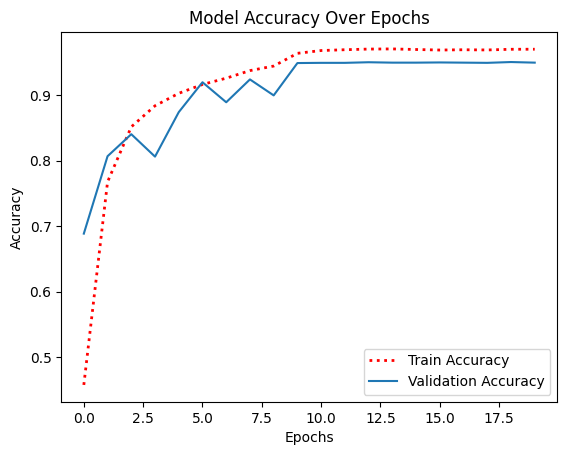

In [ ]:
 # Evaluate accuracy after training
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {train_acc:.2%}")
print(f"Final Validation Accuracy: {val_acc:.2%}")

# Test Accuracy
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2%}")

# Plot Accuracy Over Epochs
plt.plot(history.history['accuracy'],linestyle='dotted',color='red', linewidth=2, label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()

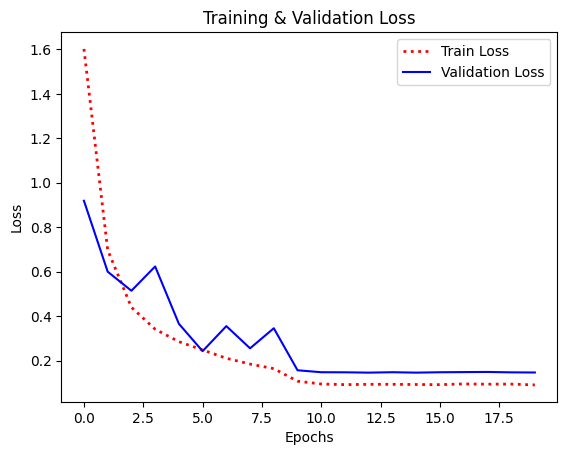

In [ ]:
plt.plot(history.history['loss'], label='Train Loss',linestyle='dotted',color='red', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss',color='blue')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Found 3243 images belonging to 11 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


102/102 ━━━━━━━━━━━━━━━━━━━━ 25s 241ms/step


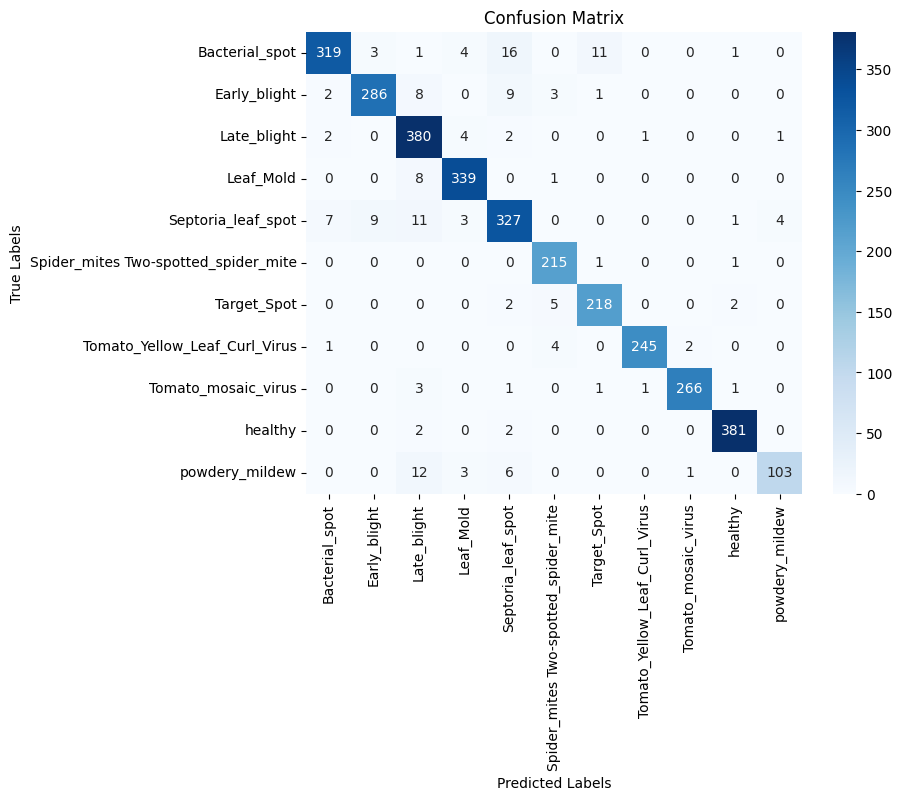

Classification Report:
                                       precision    recall  f1-score   support

                      Bacterial_spot       0.96      0.90      0.93       355
                        Early_blight       0.96      0.93      0.94       309
                         Late_blight       0.89      0.97      0.93       390
                           Leaf_Mold       0.96      0.97      0.97       348
                  Septoria_leaf_spot       0.90      0.90      0.90       362
Spider_mites Two-spotted_spider_mite       0.94      0.99      0.97       217
                         Target_Spot       0.94      0.96      0.95       227
       Tomato_Yellow_Leaf_Curl_Virus       0.99      0.97      0.98       252
                 Tomato_mosaic_virus       0.99      0.97      0.98       273
                             healthy       0.98      0.99      0.99       385
                      powdery_mildew       0.95      0.82      0.88       125

                            accuracy  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

validation_generator=validation_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

true_labels = validation_generator.classes
predictions = model.predict(validation_generator)
pred_labels = np.argmax(predictions, axis=1)

labels = sorted(validation_generator.class_indices.keys())

conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
print("Classification Report:\n", classification_report(true_labels, pred_labels, target_names=labels))
